In [3]:
import seaborn as sns 
import pandas as pd

In [4]:
!pip install kaggle
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

!kaggle competitions list

# !kaggle competitions download -c titanic
# !unzip /content/titanic.zip
# df = pd.read_csv('/content/train.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MessageError: ignored

In [ ]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 1.84MB/s]


In [ ]:
!unzip /content/supermarket-sales.zip
#df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
sales=pd.read_csv('/content/supermarket_sales - Sheet1.csv')

Archive:  /content/supermarket-sales.zip
replace supermarket_sales - Sheet1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
sales.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#  do this once 
for i in ['City','Product line']:#sales.columns:
       print(sales[i].sort_values().value_counts())

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


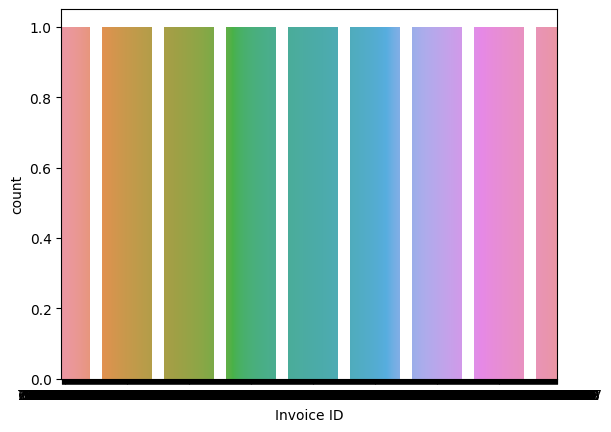

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


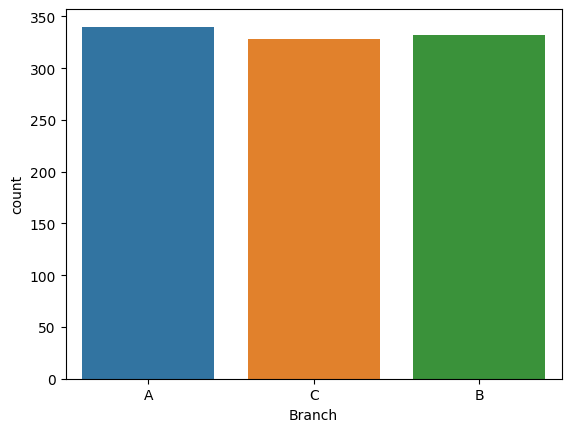

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


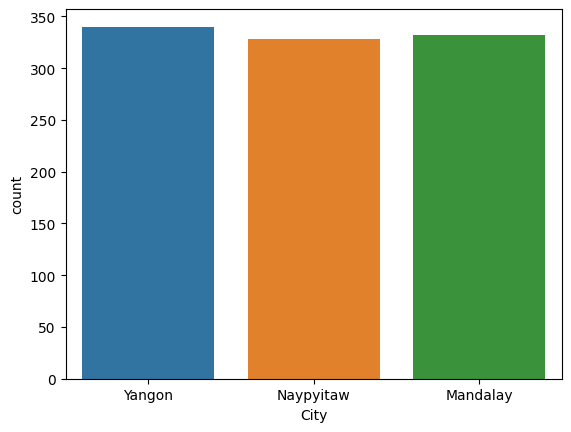

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


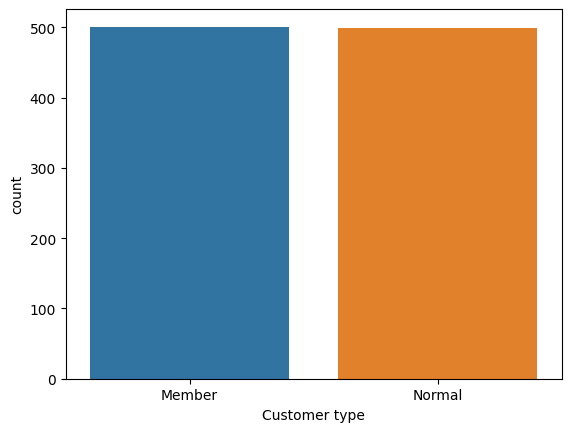

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


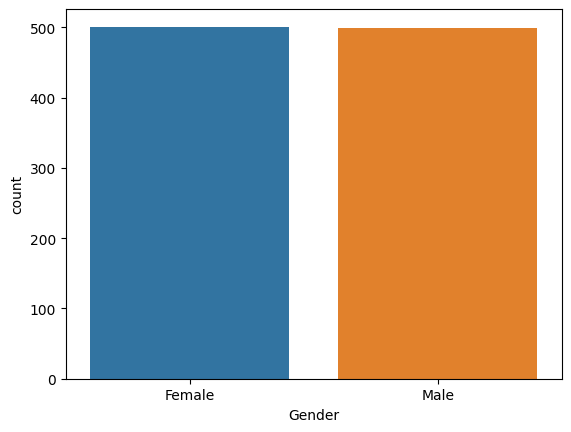

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


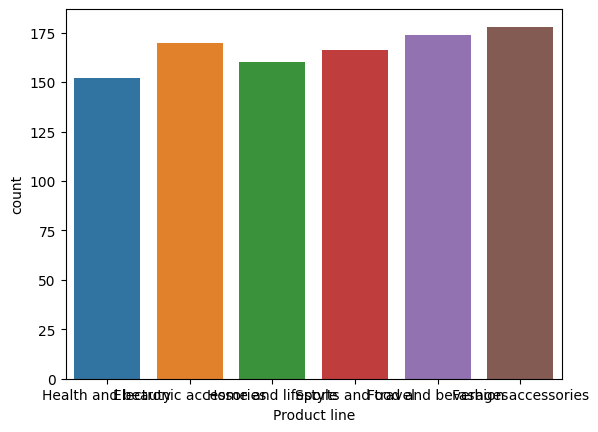

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


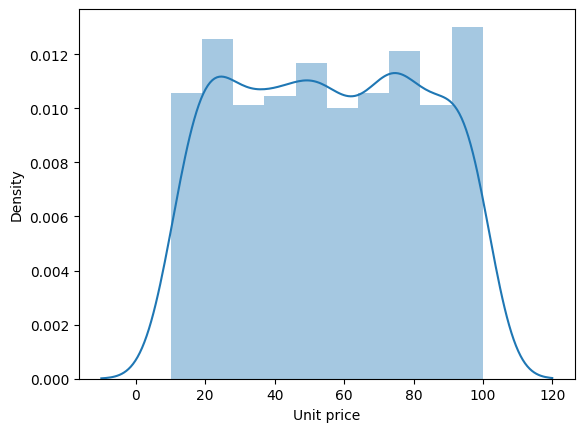

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


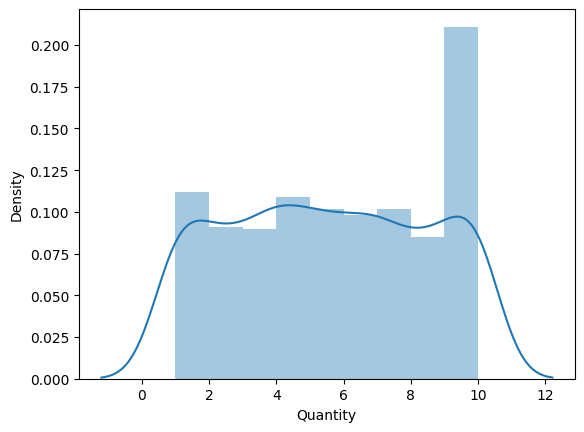

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


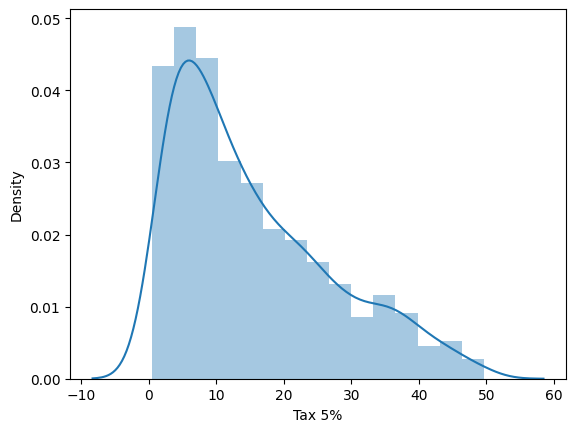

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


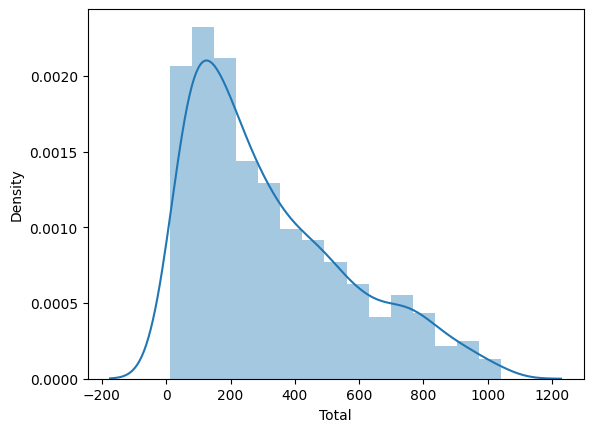

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


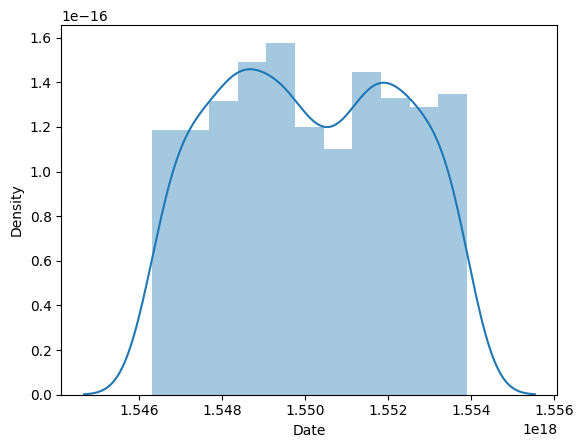

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


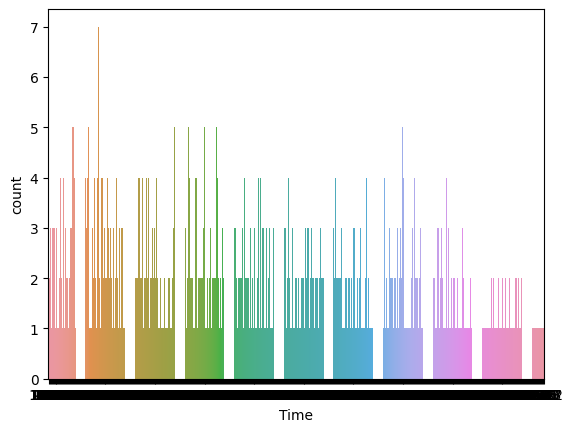

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


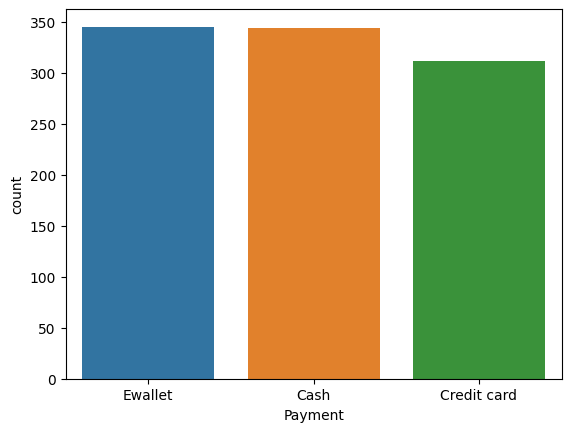

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


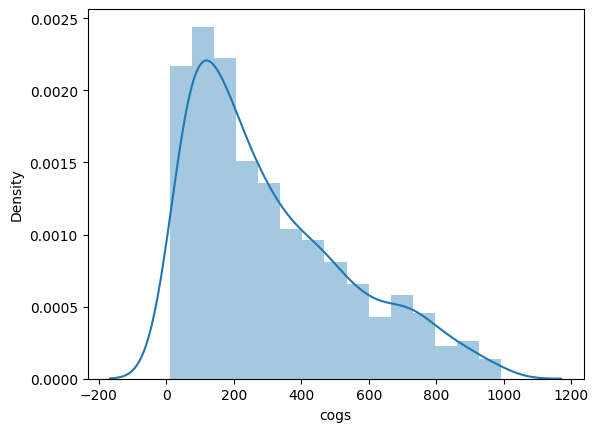

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


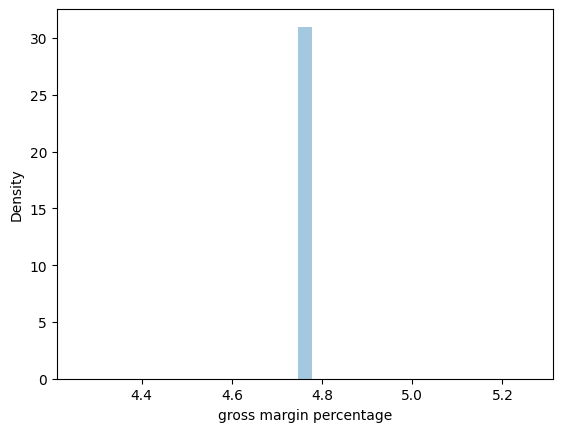

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


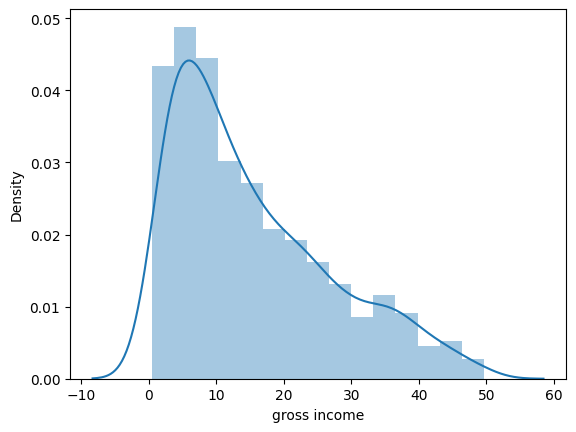

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


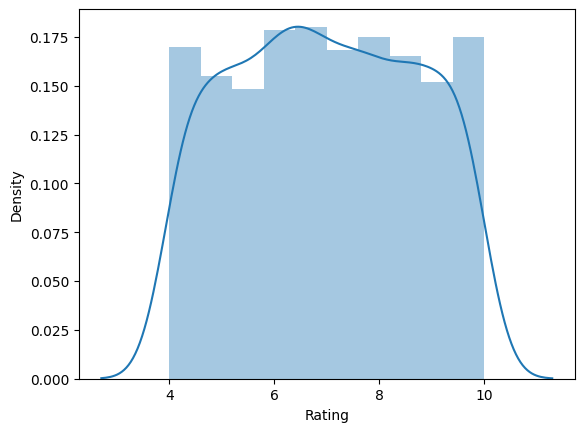

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


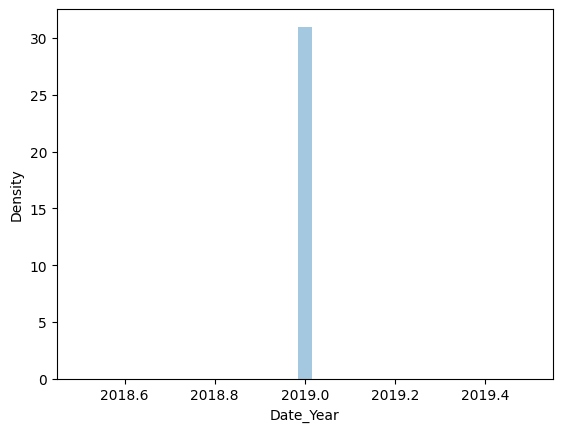

<ipython-input-171-70a44a682d6c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sales[i])


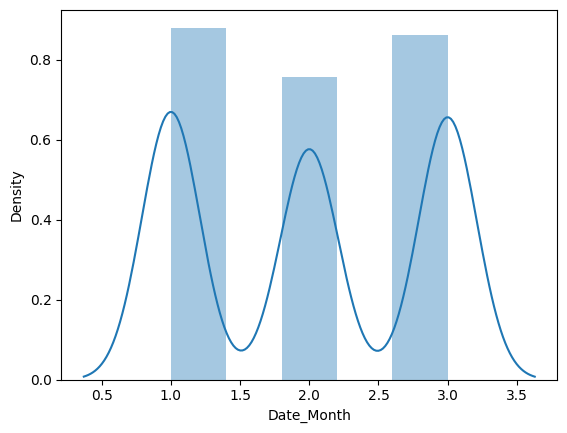

In [ ]:
#  do this once 
import matplotlib.pyplot as plt
for i in sales.columns:#['City','Product line']:#
       #print(sales[i].value_counts())
       try:
        ax=sns.distplot(sales[i])
       except:
        ax=sns.countplot(x=sales[i])
       plt.show()

In [ ]:
#Remove unneccery columns

In [ ]:
#Convert from string to numeric as needed 
#pd.to_numeric()
#pd.to_datetime()
#Convert string(/other formats) to datetime as needed
sales['Date']=pd.to_datetime(sales['Date'])

In [ ]:
#Rename columns as needed remove space and replace them with _
#df.rename(columns={'x':'x1','u':'_y'})

In [ ]:
sales.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
sales.duplicated().sum()

0

In [ ]:
sales['Invoice ID'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Invoice ID, Length: 1000, dtype: bool

In [ ]:
sales['Invoice ID'].duplicated().sum()

0

In [ ]:
sales.isna()

Invoice ID  Branch   City  Customer type  Gender  Product line  \
0         False   False  False          False   False         False   
1         False   False  False          False   False         False   
2         False   False  False          False   False         False   
3         False   False  False          False   False         False   
4         False   False  False          False   False         False   
..          ...     ...    ...            ...     ...           ...   
995       False   False  False          False   False         False   
996       False   False  False          False   False         False   
997       False   False  False          False   False         False   
998       False   False  False          False   False         False   
999       False   False  False          False   False         False   

     Unit price  Quantity  Tax 5%  Total   Date   Time  Payment   cogs  \
0         False     False   False  False  False  False    False  False   
1         False     False   False  False  False  False    False  False   
2         False     False   False  False  False  False    False  False   
3         False     False   False  False  False  False    False  False   
4         False     False   False  False  False  False    False  False   
..          ...       ...     ...    ...    ...    ...      ...    ...   
995       False     False   False  False  False  False    False  False   
996       False     False   False  False  False  False    False  False   
997       False     False   False  False  False  False    False  False   
998       False     False   False  False  False  False    False  False   
999       False     False   False  False  False  False    False  False   

     gross margin percentage  gross income  Rating  
0                      False         False   False  
1                      False         False   False  
2                      False         False   False  
3                      False         False   False  
4                      False         False   False  
..                       ...           ...     ...  
995                    False         False   False  
996                    False         False   False  
997                    False         False   False  
998                    False         False   False  
999                    False         False   False  

[1000 rows x 17 columns]

In [ ]:
#to see duplicate records
sales.loc[sales.duplicated()]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [ ]:
sales.query('Branch =="A"')

Invoice ID Branch    City Customer type  Gender            Product line  \
0    750-67-8428      A  Yangon        Member  Female       Health and beauty   
2    631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176      A  Yangon        Member    Male       Health and beauty   
4    373-73-7910      A  Yangon        Normal    Male       Sports and travel   
6    355-53-5943      A  Yangon        Member  Female  Electronic accessories   
..           ...    ...     ...           ...     ...                     ...   
990  886-18-2897      A  Yangon        Normal  Female      Food and beverages   
992  745-74-0715      A  Yangon        Normal    Male  Electronic accessories   
997  727-02-1313      A  Yangon        Member    Male      Food and beverages   
998  347-56-2442      A  Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807      A  Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0         74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
2         46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card   
3         58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
4         86.31         7  30.2085  634.3785   2/8/2019  10:37      Ewallet   
6         68.84         6  20.6520  433.6920  2/25/2019  14:36      Ewallet   
..          ...       ...      ...       ...        ...    ...          ...   
990       56.56         5  14.1400  296.9400  3/22/2019  19:06  Credit card   
992       58.03         2   5.8030  121.8630  3/10/2019  20:46      Ewallet   
997       31.84         1   1.5920   33.4320   2/9/2019  13:22         Cash   
998       65.82         1   3.2910   69.1110  2/22/2019  15:33         Cash   
999       88.34         7  30.9190  649.2990  2/18/2019  13:28         Cash   

       cogs  gross margin percentage  gross income  Rating  
0    522.83                 4.761905       26.1415     9.1  
2    324.31                 4.761905       16.2155     7.4  
3    465.76                 4.761905       23.2880     8.4  
4    604.17                 4.761905       30.2085     5.3  
6    413.04                 4.761905       20.6520     5.8  
..      ...                      ...           ...     ...  
990  282.80                 4.761905       14.1400     4.5  
992  116.06                 4.761905        5.8030     8.8  
997   31.84                 4.761905        1.5920     7.7  
998   65.82                 4.761905        3.2910     4.1  
999  618.38                 4.761905       30.9190     6.6  

[340 rows x 17 columns]

In [ ]:
sales.duplicated(subset=['Branch','Gender'])

0      False
1      False
2      False
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

In [ ]:
# Some grapghs

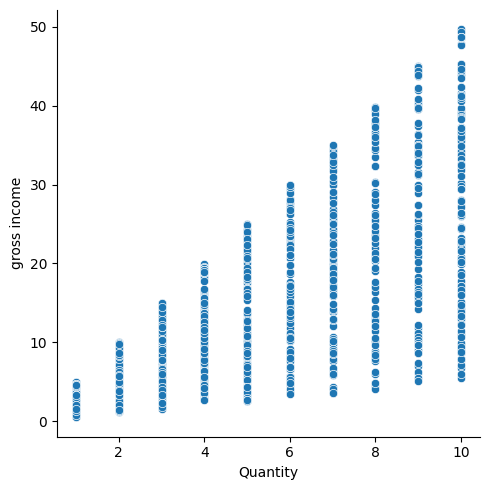

In [ ]:
sns.relplot(x='Quantity',y='gross income',data=sales)

<Axes: xlabel='Total', ylabel='gross income'>

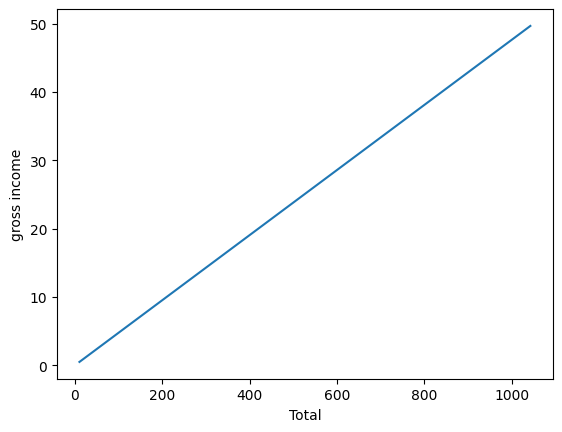

In [ ]:
sns.lineplot(x='Total',y='gross income',data=sales)

In [ ]:
sales[['Total','gross margin percentage']]

Total  gross margin percentage
0     548.9715                 4.761905
1      80.2200                 4.761905
2     340.5255                 4.761905
3     489.0480                 4.761905
4     634.3785                 4.761905
..         ...                      ...
995    42.3675                 4.761905
996  1022.4900                 4.761905
997    33.4320                 4.761905
998    69.1110                 4.761905
999   649.2990                 4.761905

[1000 rows x 2 columns]

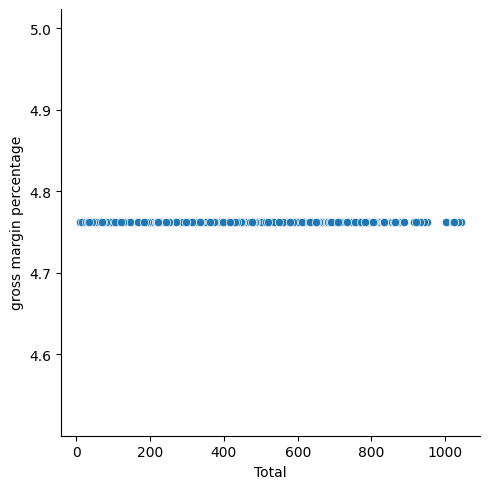

In [ ]:
sns.relplot(x='Total',y='gross margin percentage',data=sales)

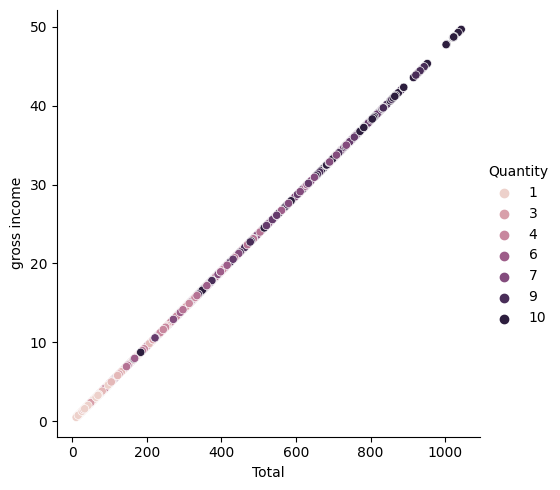

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,hue='Quantity')

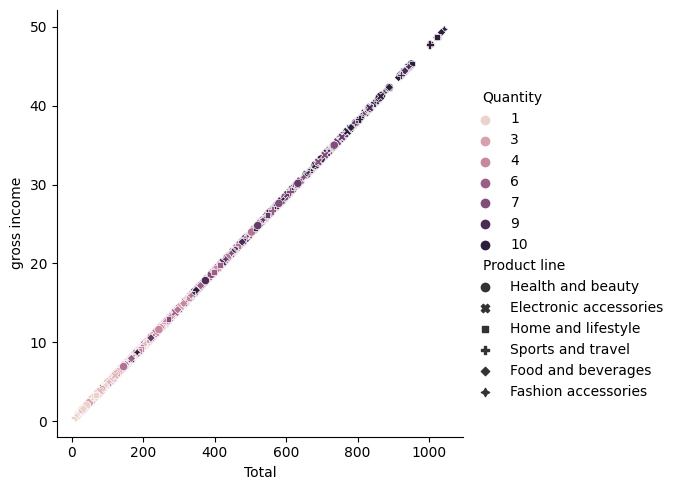

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,hue='Quantity',style='Product line')

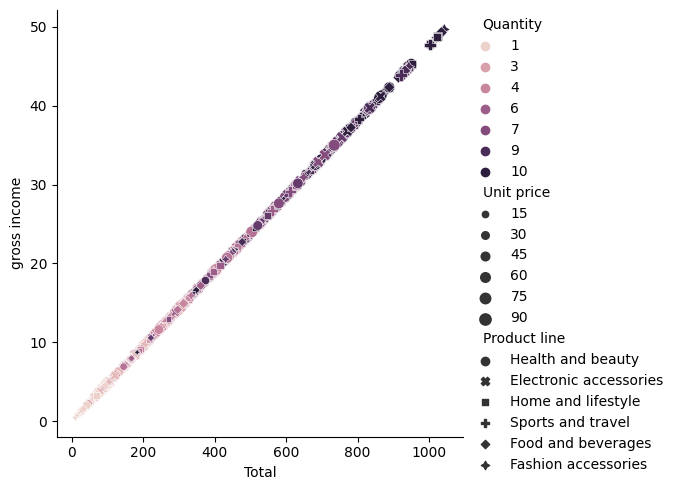

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,hue='Quantity',style='Product line',size='Unit price')

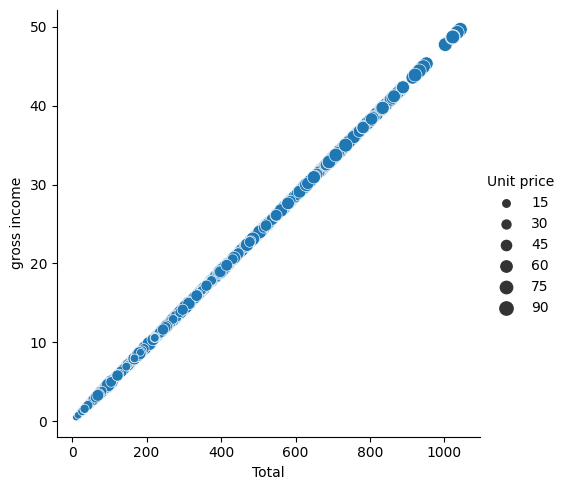

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,size='Unit price',sizes=(25,100))

In [ ]:
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

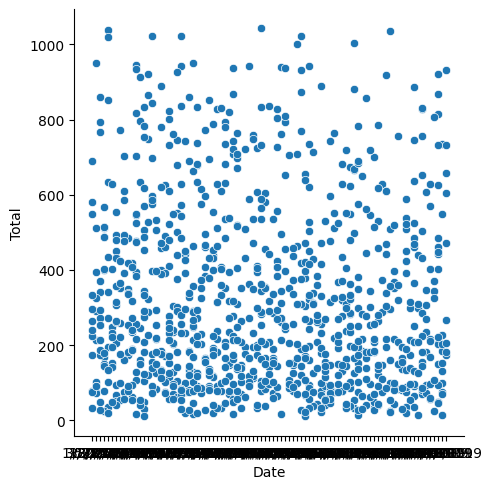

In [ ]:
sns.relplot(x='Date',y='Total',data=sales)

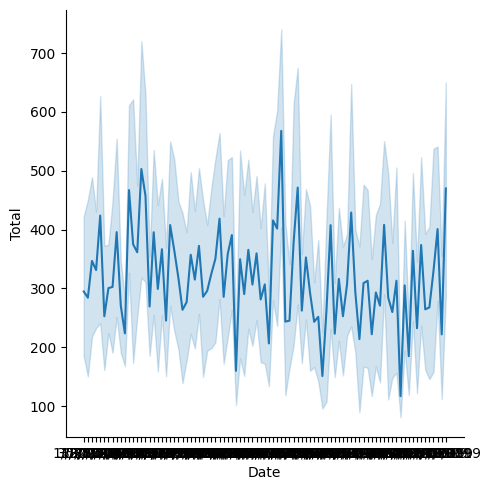

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line')

In [ ]:
sales['Date_Month']=sales['Date'].dt.month

In [ ]:
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

   Date_Year  
0       2019  
1       2019  
2       2019  
3       2019  
4       2019

In [ ]:
sales.Date_Month.unique()

array([1, 3, 2])

In [ ]:
sns.relplot(x='Date_Month',y='Total',date=sales,kind='line')

ValueError: ignored

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


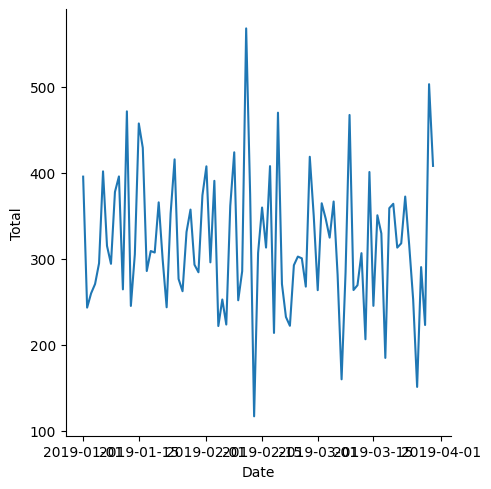

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci=None) # confidence internvel

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


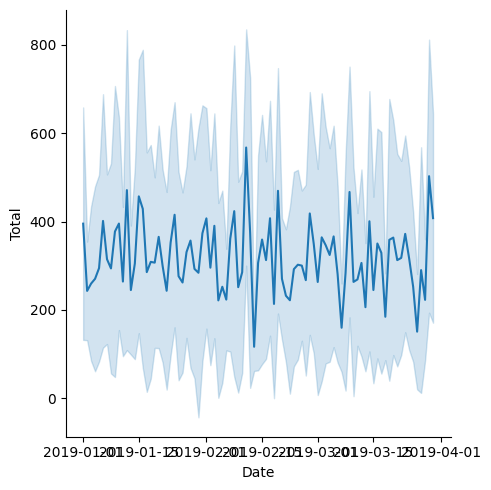

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd') # confidence internvel

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


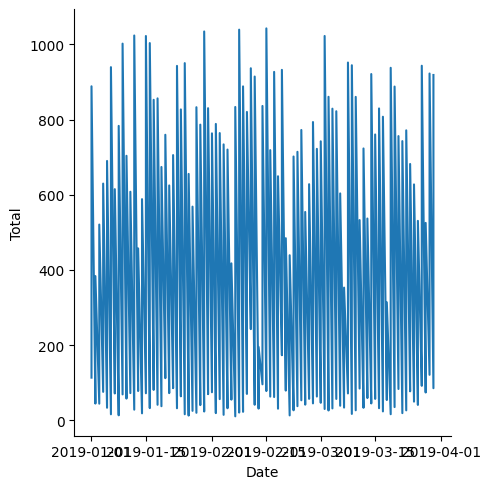

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=None) # estimator none shows values as it is

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


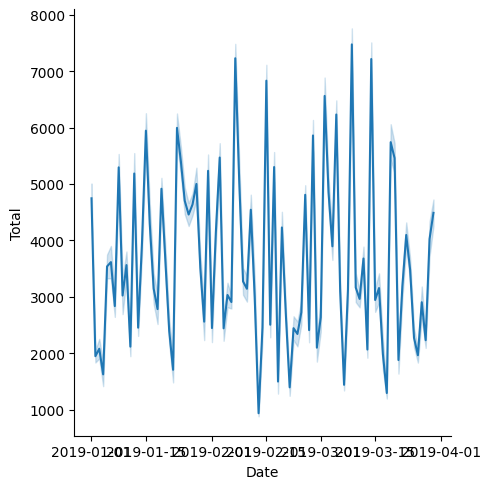

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=sum) # estimator sum all values

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


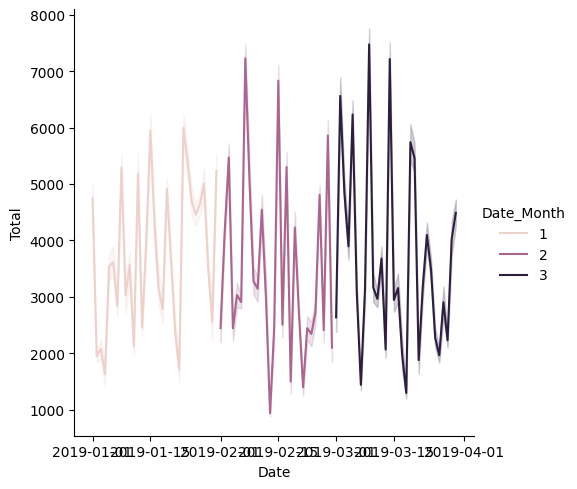

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=sum,hue='Date_Month') # estimator sum all values

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


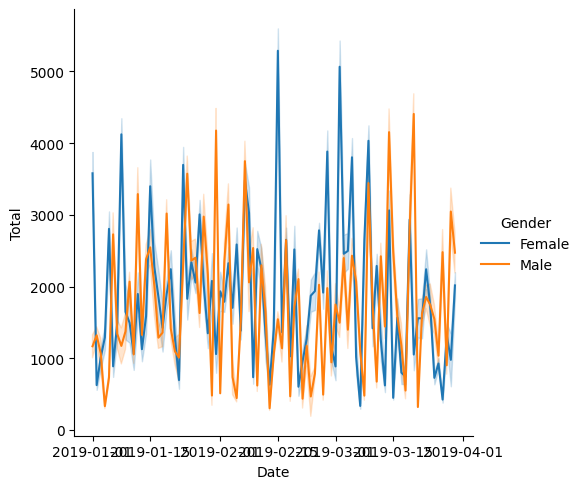

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=sum,hue='Gender') # estimator sum all values

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seabor

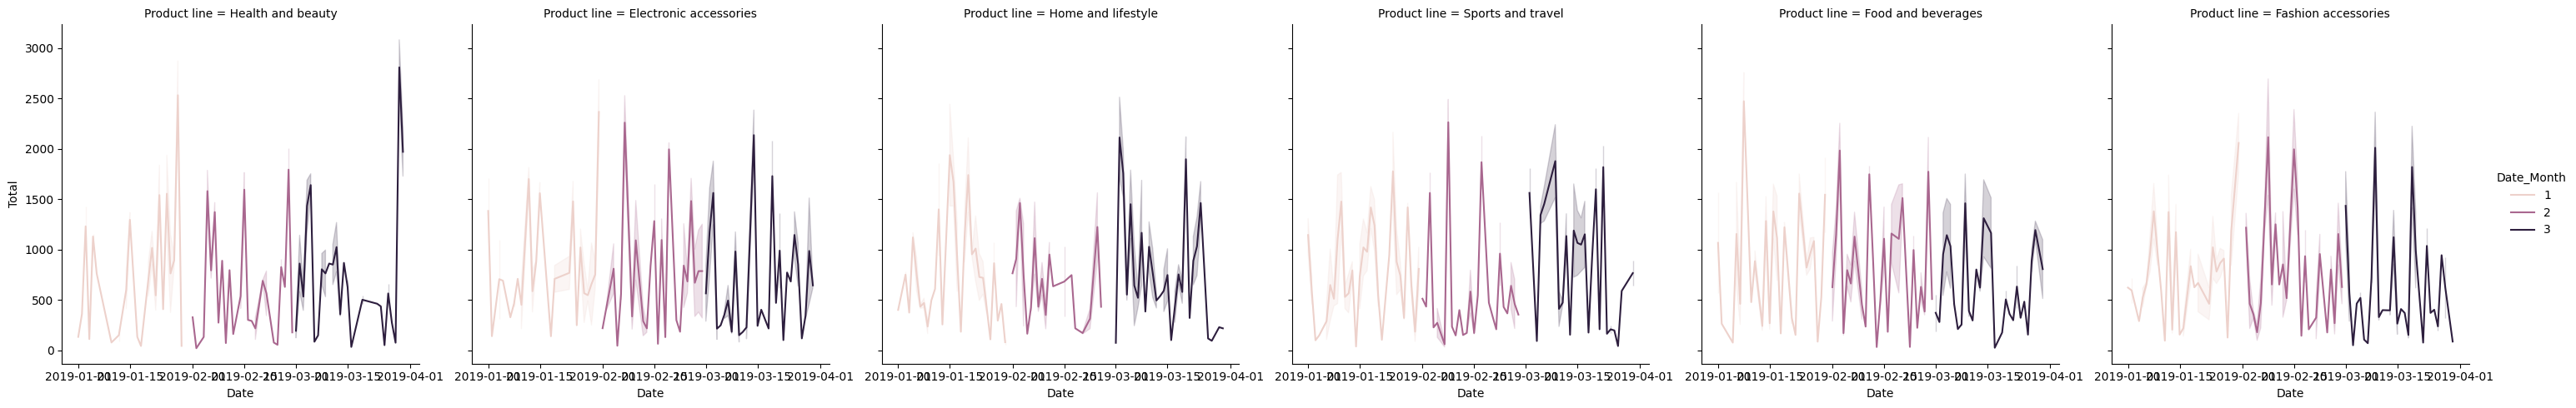

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=sum,col='Product line',hue='Date_Month') # estimator sum all values

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seabor

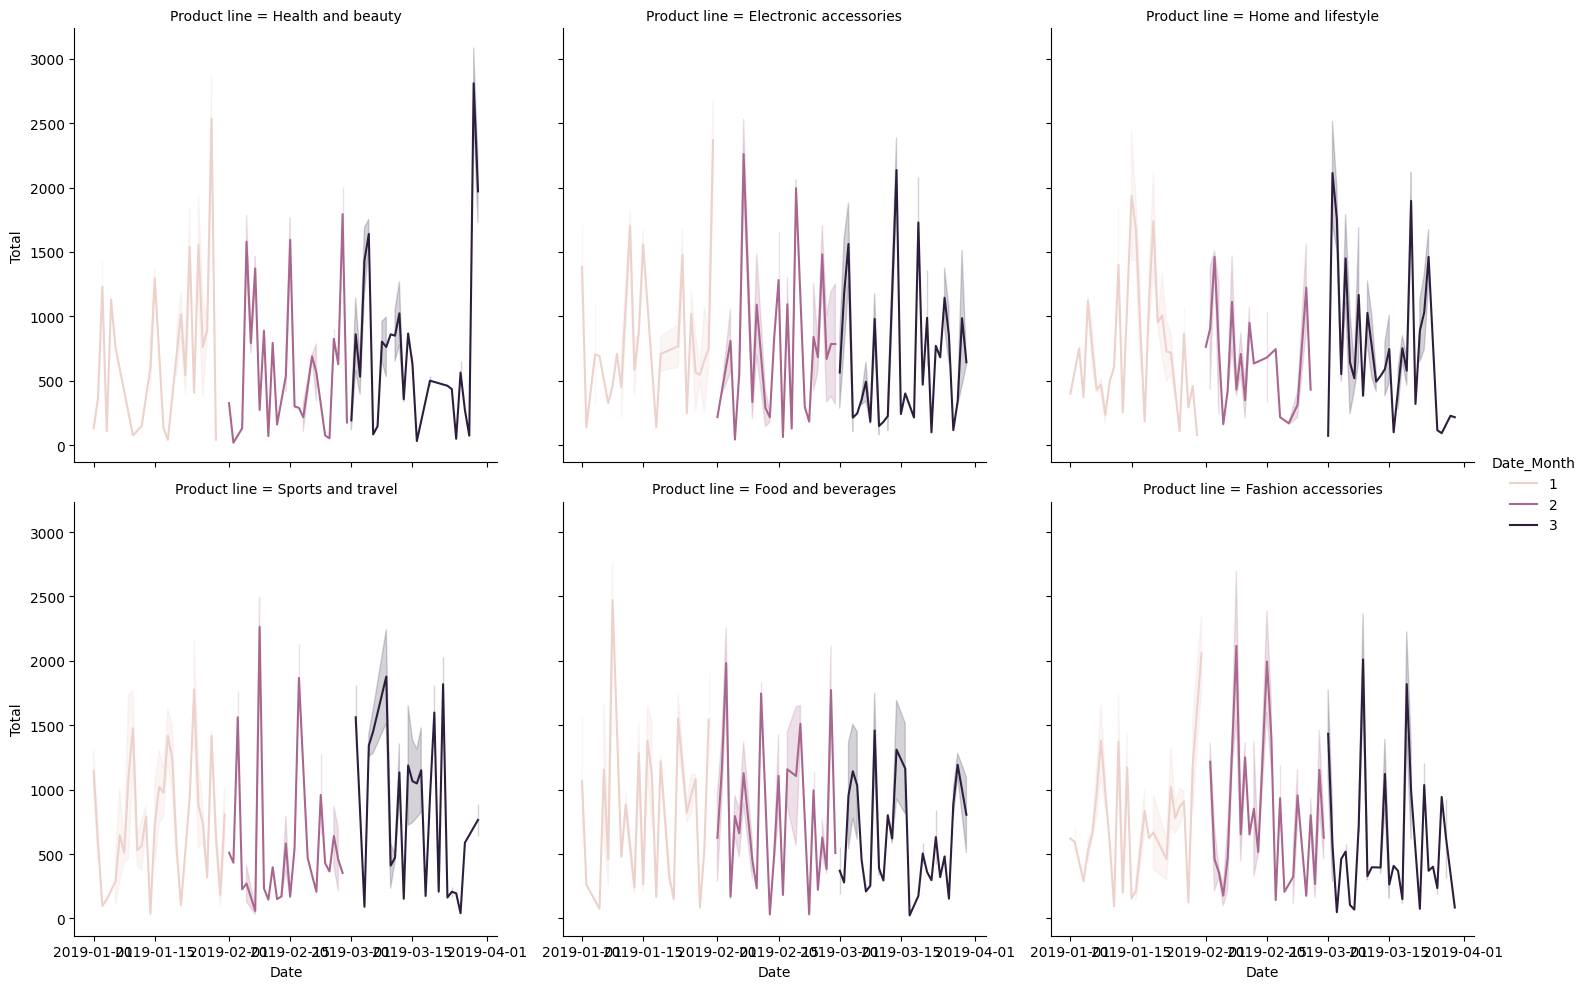

In [ ]:
sns.relplot(x='Date',y='Total',data=sales,kind='line',ci='sd',estimator=sum,col='Product line',hue='Date_Month',col_wrap=3)  # use col_wrap for deciding number of grapghs per line

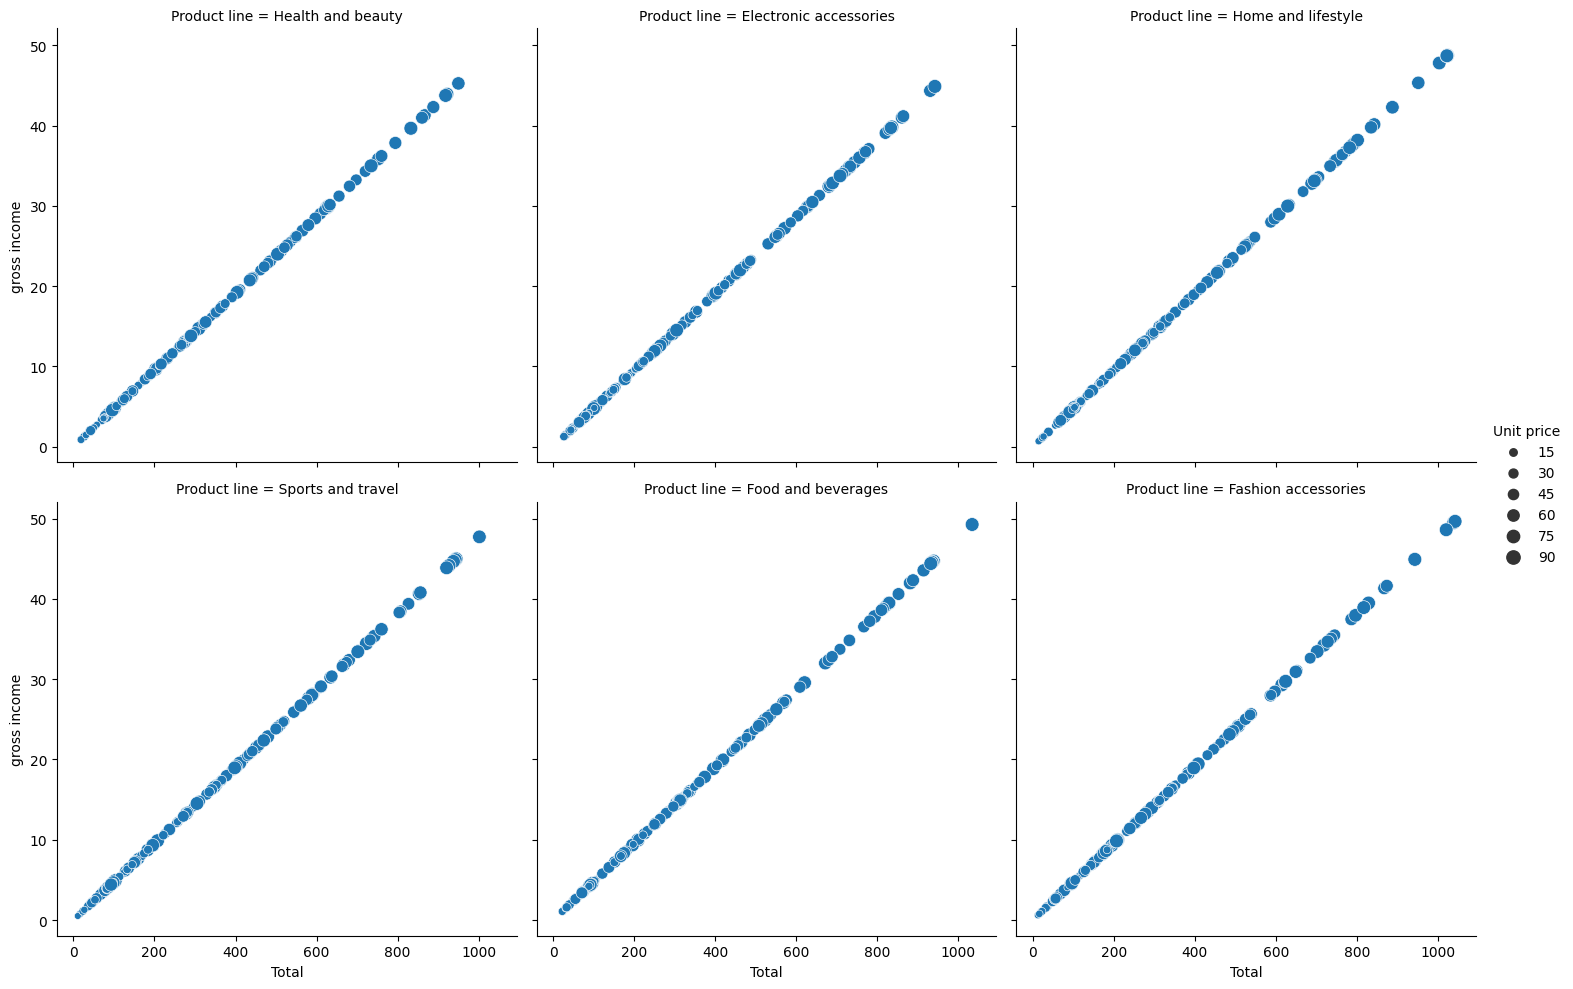

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,size='Unit price',sizes=(25,100),col='Product line',col_wrap=3)

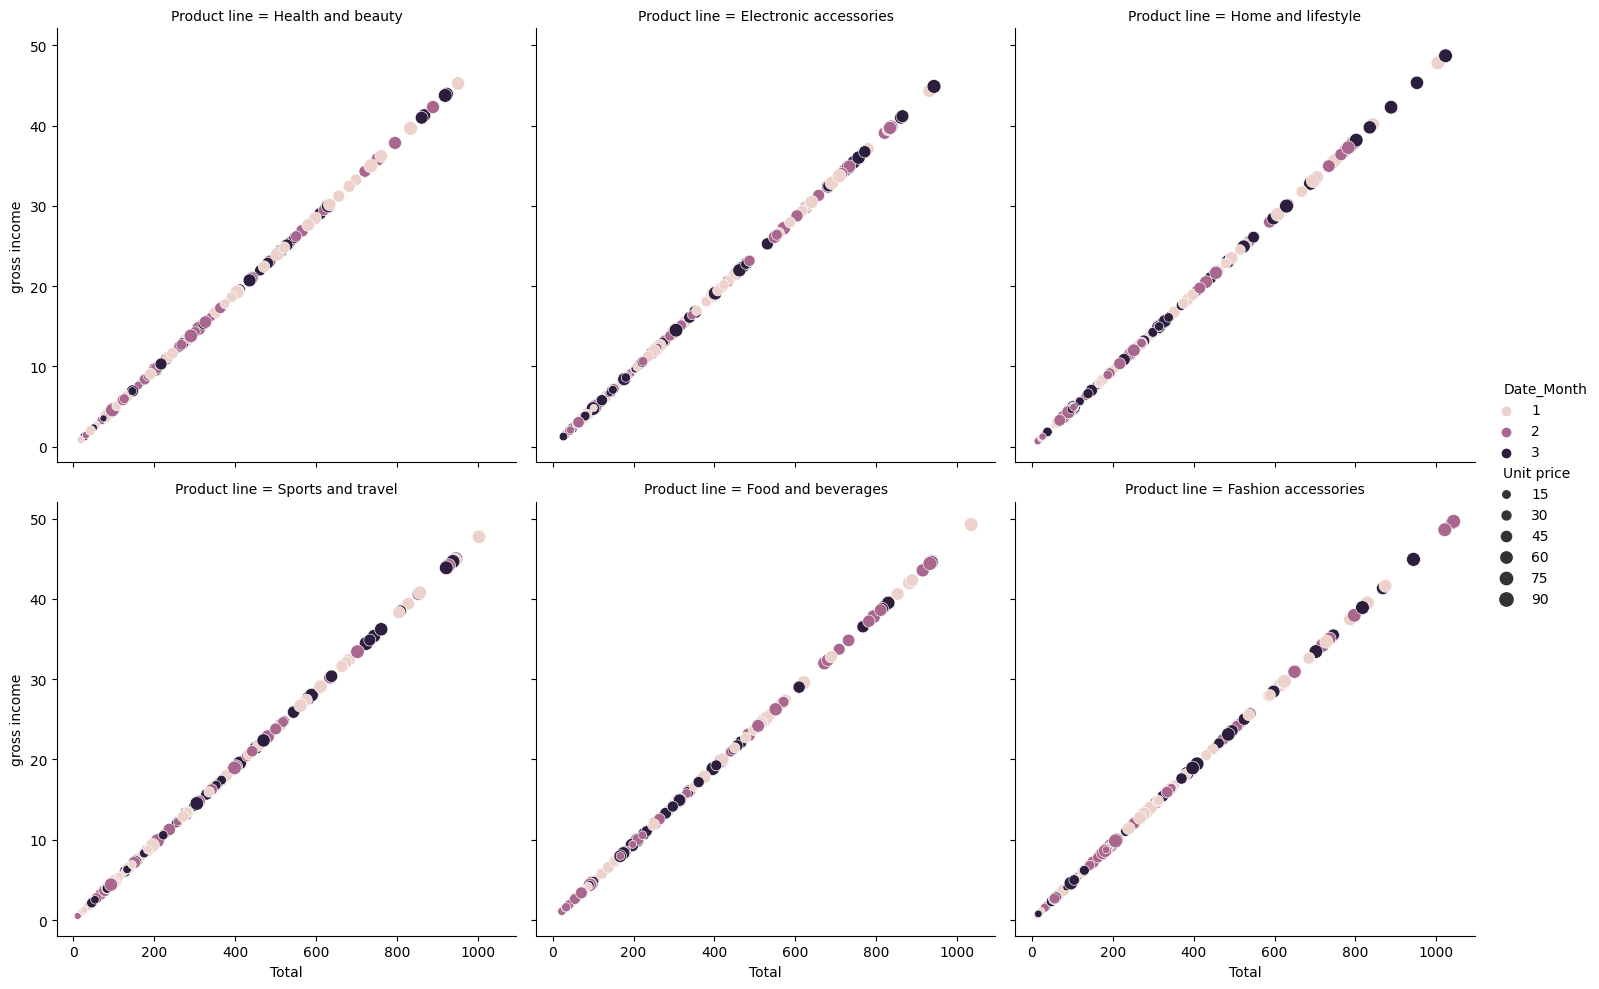

In [ ]:
 sns.relplot(x='Total',y='gross income',data=sales,size='Unit price',sizes=(25,100),col='Product line',col_wrap=3,hue='Date_Month')

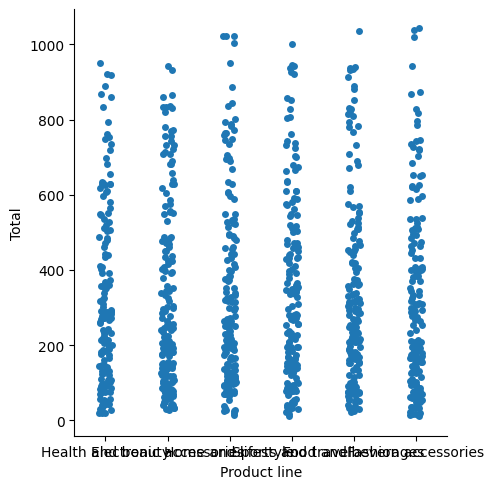

In [ ]:
sns.catplot(x='Product line',y='Total',data=sales)

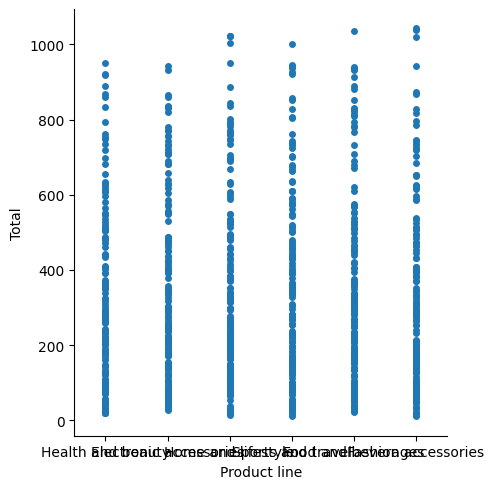

In [ ]:
sns.catplot(x='Product line',y='Total',data=sales,jitter=False)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; yo

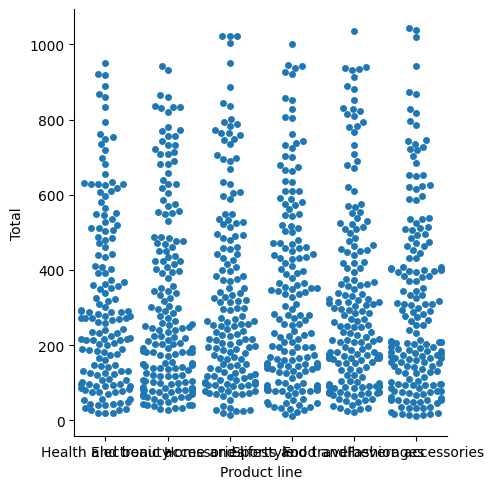

In [ ]:
sns.catplot(x='Product line',y='Total',data=sales,kind='swarm')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.0% of the points cannot be placed; y

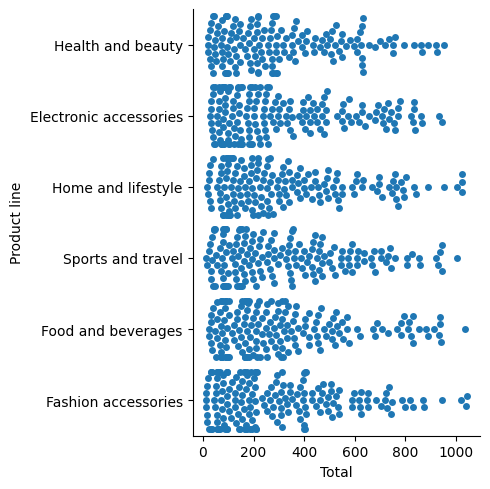

In [ ]:
sns.catplot(y='Product line',x='Total',data=sales,kind='swarm')

In [ ]:
sales.head(2)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   

    Time  Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08  Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29     Cash   76.40                 4.761905        3.8200     9.6   

   Date_Year  Date_Month  
0       2019           1  
1       2019           3

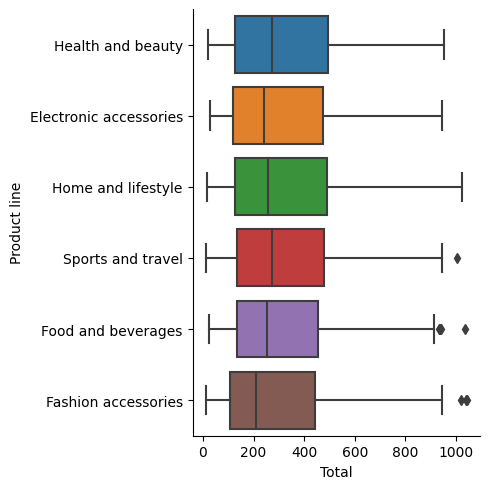

In [ ]:
sns.catplot(y='Product line',x='Total',data=sales,kind='box')

<Axes: xlabel='Total', ylabel='Product line'>

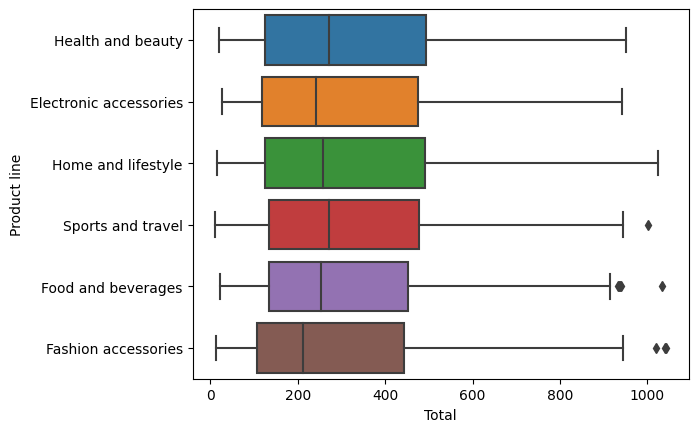

In [ ]:
sns.boxplot(y='Product line',x='Total',data=sales)

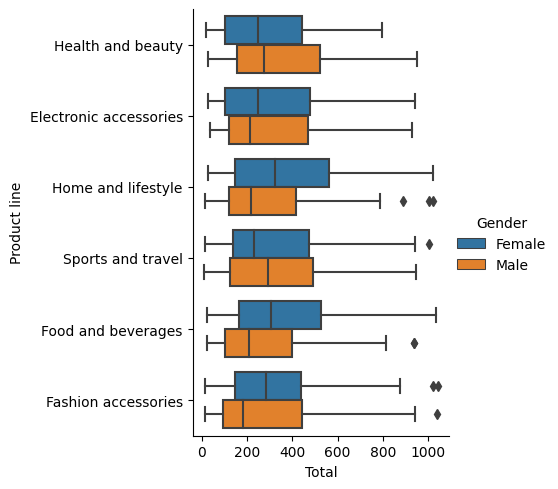

In [ ]:
sns.catplot(y='Product line',x='Total',data=sales,hue='Gender',kind='box') #  #we can even add hue sequence to decide what to show first

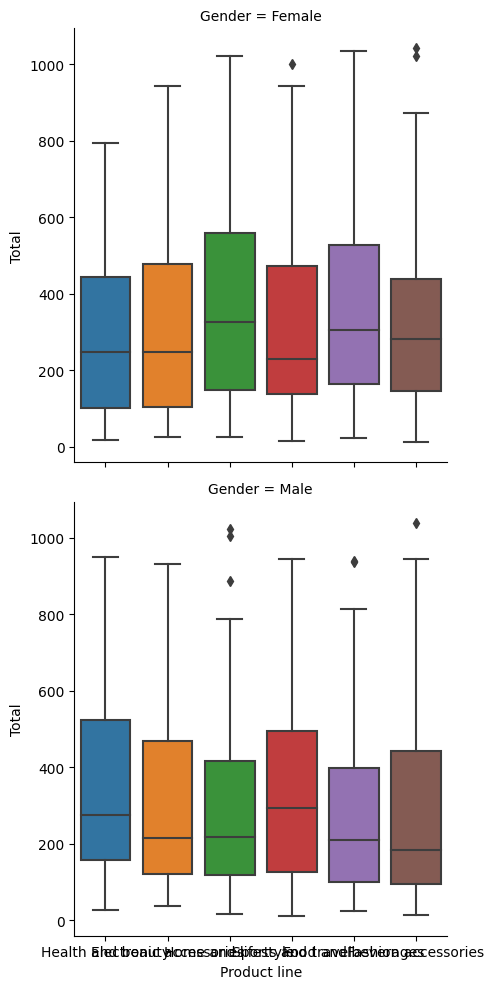

In [ ]:
# to seperate them independently add row
#!pip install --upgrade --user matplotlib
sns.catplot(x='Product line',y='Total',row='Gender',data=sales,kind='box')  

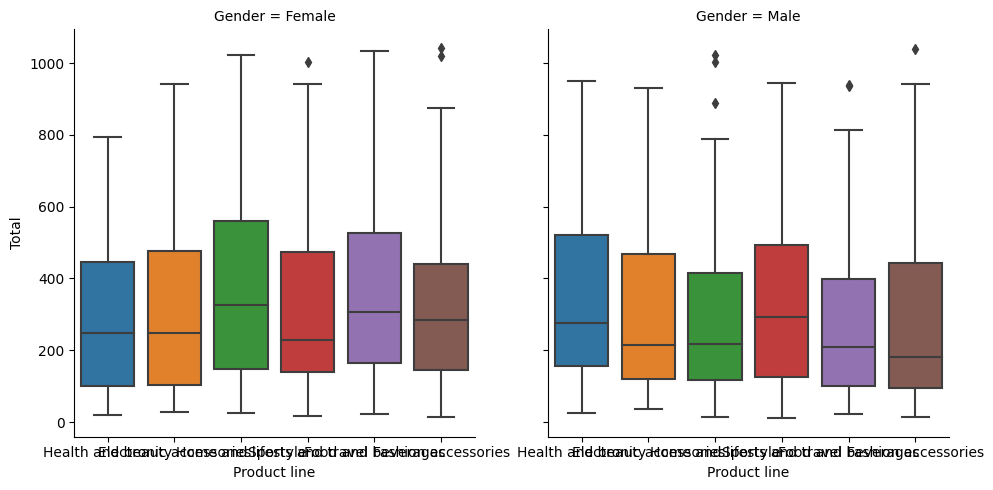

In [ ]:
# to seperate them independently add row
#!pip install --upgrade --user matplotlib
sns.catplot(x='Product line',y='Total',col='Gender',data=sales,kind='box')  

In [ ]:
#Violin Charts

In [ ]:
sales.head(2)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   

    Time  Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08  Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29     Cash   76.40                 4.761905        3.8200     9.6   

   Date_Year  Date_Month  
0       2019           1  
1       2019           3

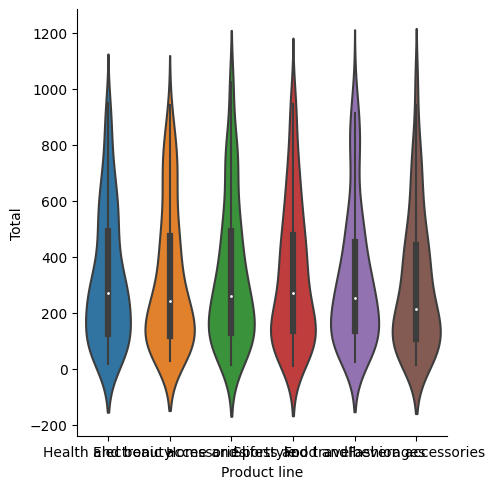

In [ ]:
sns.catplot(x='Product line',y='Total',data=sales,kind='violin')  

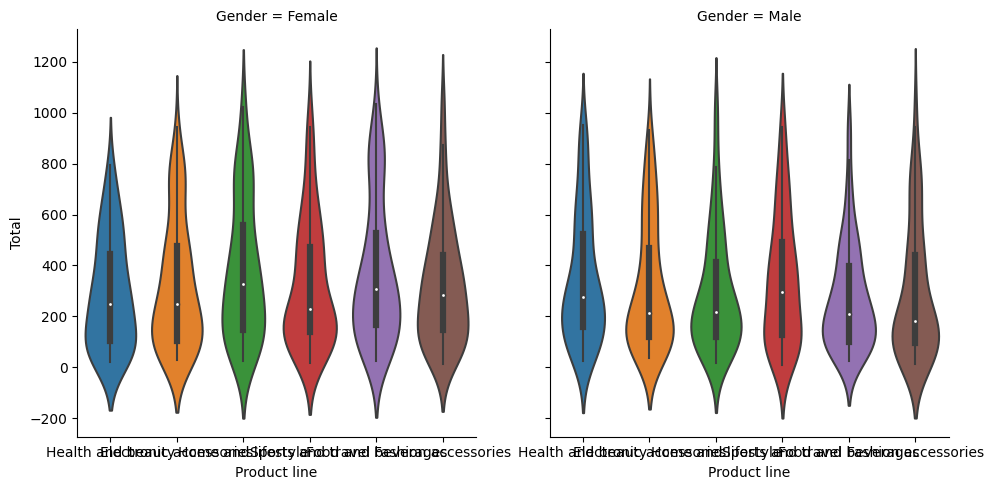

In [ ]:
sns.catplot(x='Product line',y='Total',col='Gender',data=sales,kind='violin')  

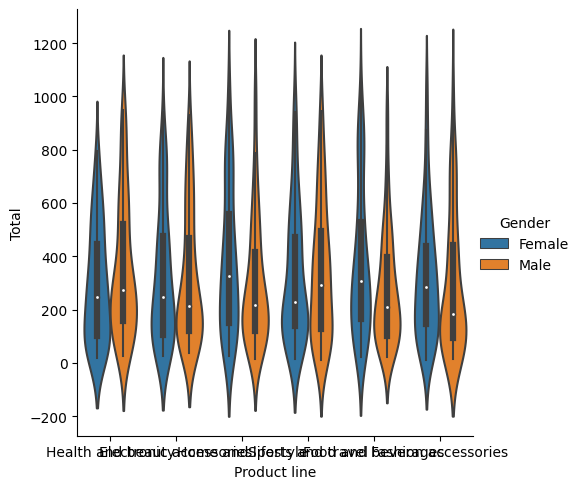

In [ ]:
sns.catplot(x='Product line',y='Total',hue='Gender',data=sales,kind='violin')  

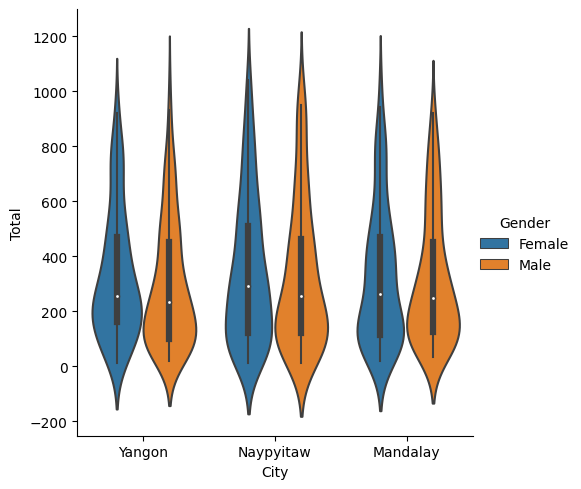

In [ ]:
sns.catplot(x='City',y='Total',hue='Gender',data=sales,kind='violin')  

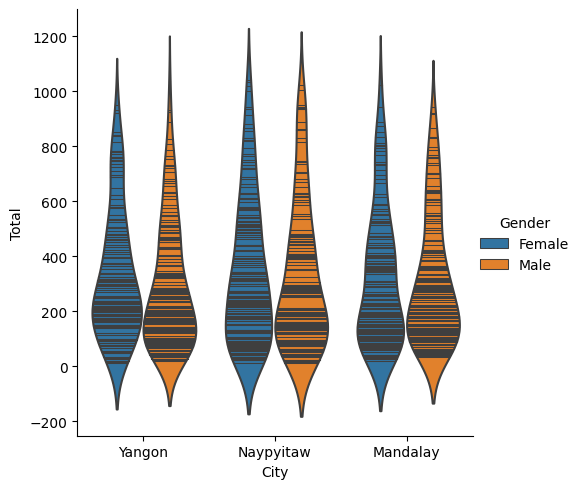

In [ ]:
sns.catplot(x='City',y='Total',hue='Gender',data=sales,kind='violin',inner='stick') 

In [ ]:
#Bar Charts

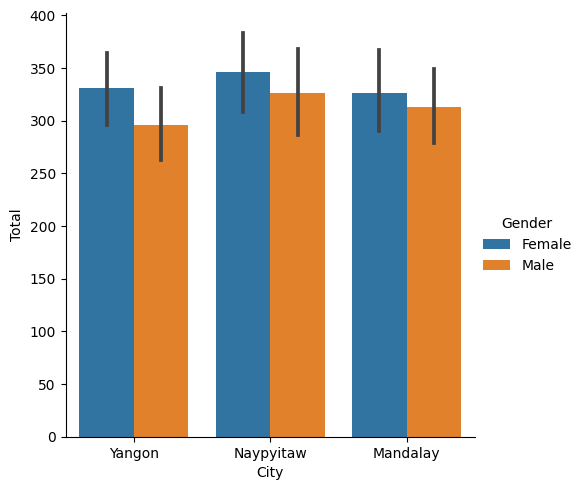

In [ ]:
sns.catplot(x='City',y='Total',hue='Gender',data=sales,kind='bar') 

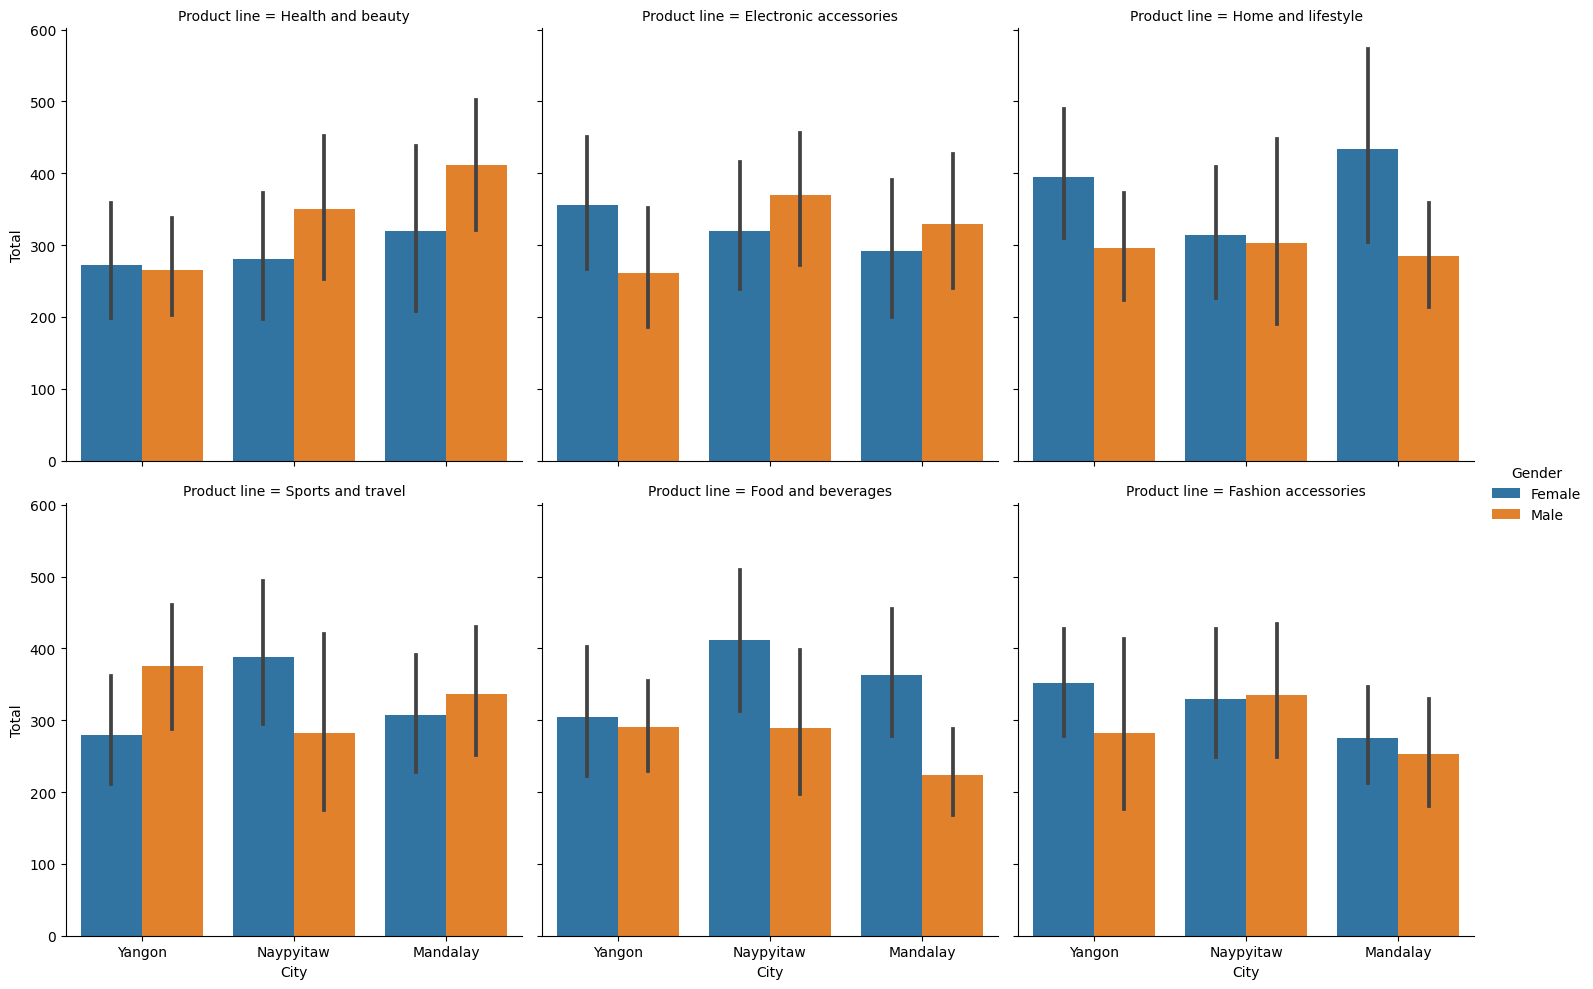

In [ ]:
sns.catplot(x='City',y='Total',hue='Gender',data=sales,kind='bar',col='Product line',col_wrap=3) 

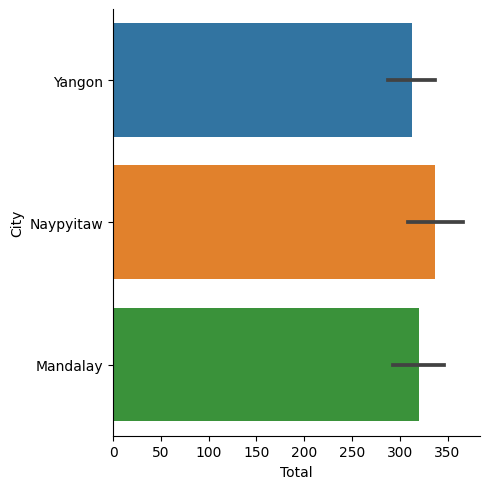

In [ ]:
sns.catplot(y='City',x='Total',data=sales,kind='bar') 

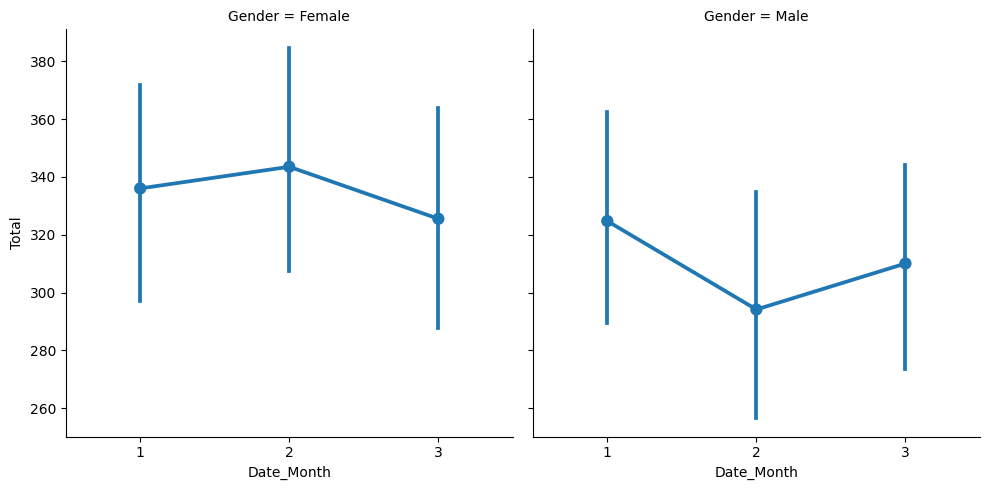

In [ ]:
sns.catplot(x='Date_Month',y='Total',col='Gender',data=sales,kind='point') 

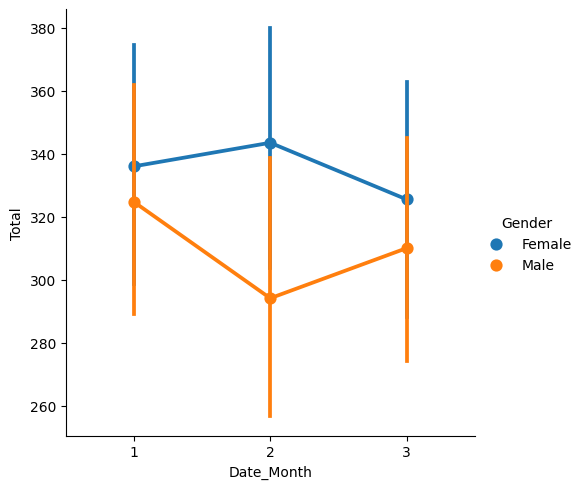

In [ ]:
sns.catplot(x='Date_Month',y='Total',hue='Gender',data=sales,kind='point') 

<ipython-input-149-928dfe8bab2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Total)


<Axes: xlabel='Total', ylabel='Density'>

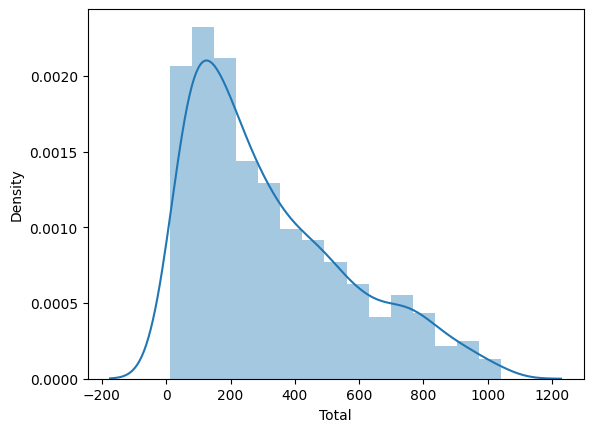

In [ ]:
sns.distplot(sales.Total)

<ipython-input-151-43708d63061a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Quantity)


<Axes: xlabel='Quantity', ylabel='Density'>

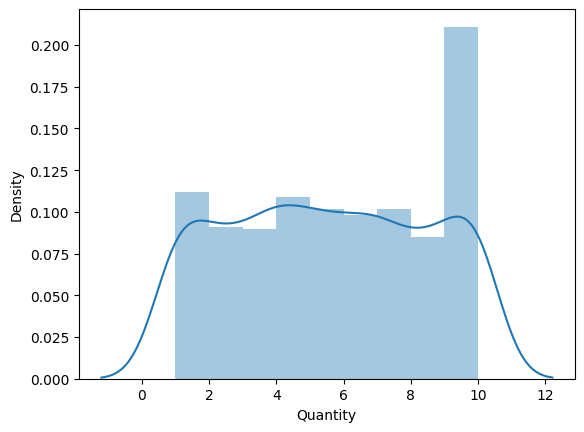

In [ ]:
sns.distplot(sales.Quantity)

<ipython-input-172-7a9804cee18d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Quantity,kde=False)


<Axes: xlabel='Quantity'>

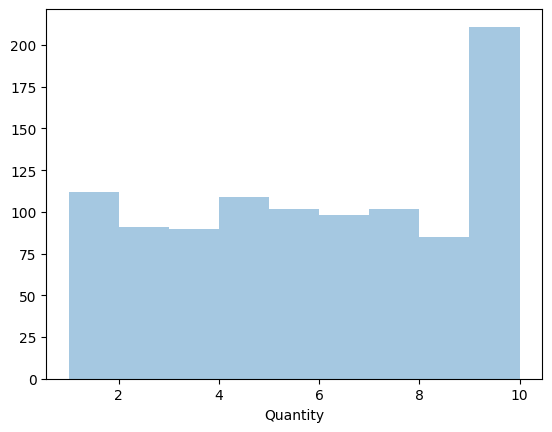

In [ ]:
sns.distplot(sales.Quantity,kde=False)

<ipython-input-173-f6db5eccc705>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Quantity,hist=False)


<Axes: xlabel='Quantity', ylabel='Density'>

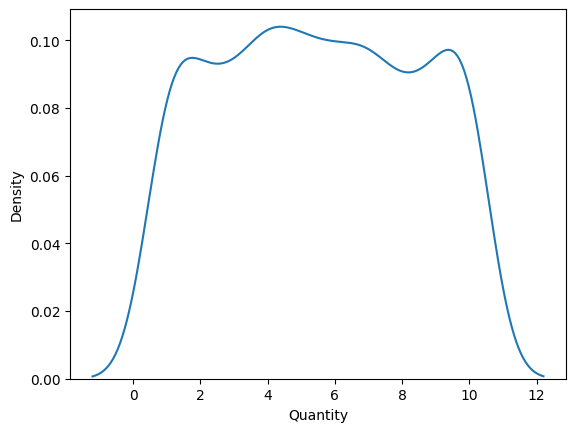

In [ ]:
sns.distplot(sales.Quantity,hist=False)

<ipython-input-175-e5d0d1568ab2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales.Quantity,hist=False,rug=True) #it shows the distribution of the data


<Axes: xlabel='Quantity', ylabel='Density'>

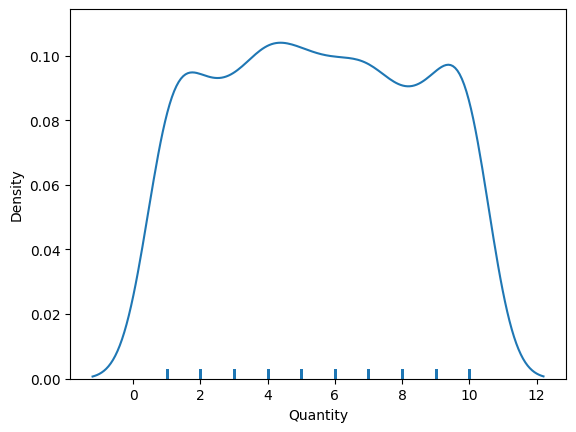

In [ ]:
sns.distplot(sales.Quantity,hist=False,rug=True) #it shows the distribution of the data

In [ ]:
sns.distplot(sales.Quantity,hist=False,rug=True,bins=) #can try bins

SyntaxError: ignored

<ipython-input-179-7514f10fb9dd>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=100`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(sales.Quantity,bw=100) #bw how sensitive to kde


<Axes: xlabel='Quantity', ylabel='Density'>

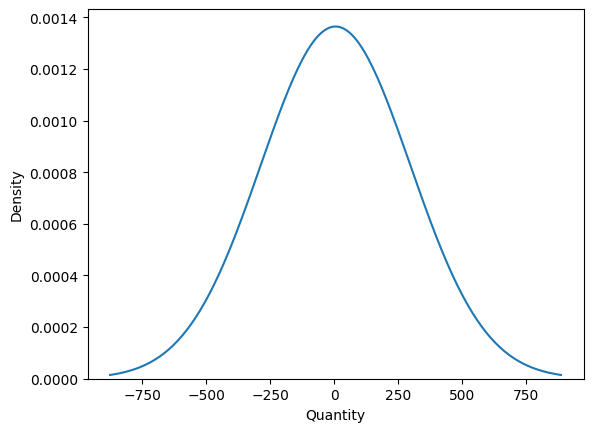

In [ ]:
sns.kdeplot(sales.Quantity,bw=100) #bw how sensitive to kde

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
a=np.random.gamma(6,size=200)

<ipython-input-184-f134c0697e25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a)


<Axes: ylabel='Density'>

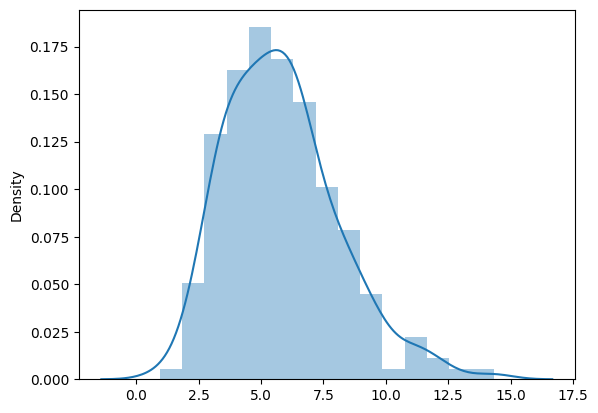

In [ ]:
sns.distplot(a)

<ipython-input-185-2391342a99b1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a,fit=stats.gamma)


<Axes: ylabel='Density'>

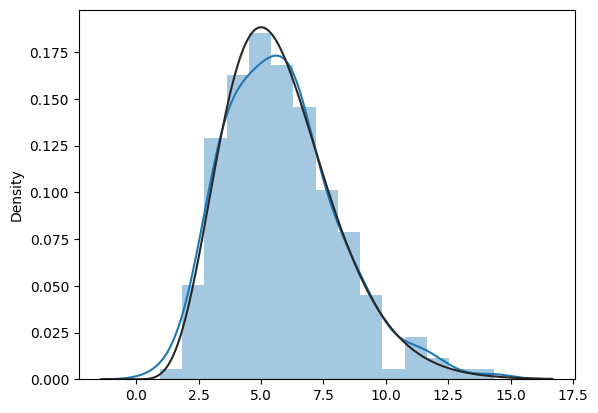

In [ ]:
sns.distplot(a,fit=stats.gamma)

<ipython-input-188-021de0fac6b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a,fit=stats.gamma,kde=False)


<Axes: >

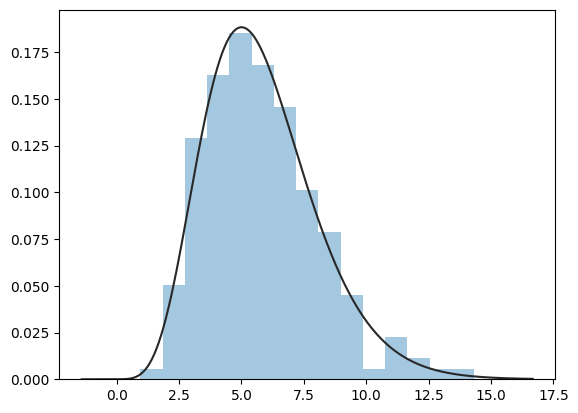

In [ ]:
sns.distplot(a,fit=stats.gamma,kde=False)

In [ ]:
#joint pplots 

In [ ]:
sales.head(2)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   

    Time  Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08  Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29     Cash   76.40                 4.761905        3.8200     9.6   

   Date_Year  Date_Month  
0       2019           1  
1       2019           3

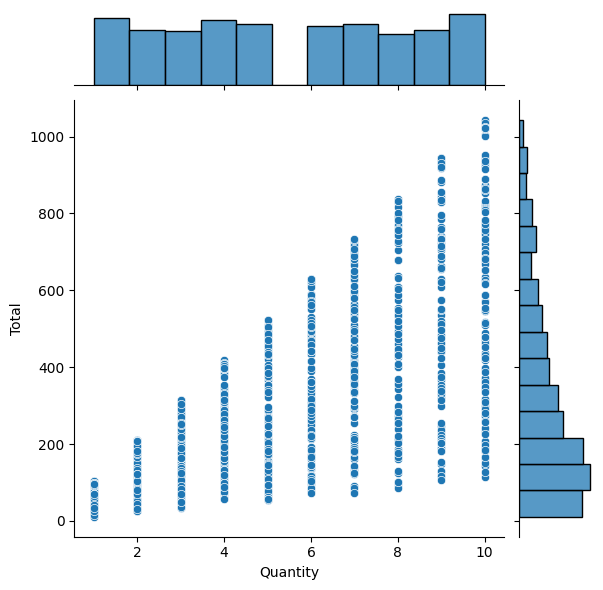

In [ ]:
sns.jointplot(y='Total',x='Quantity',data=sales)

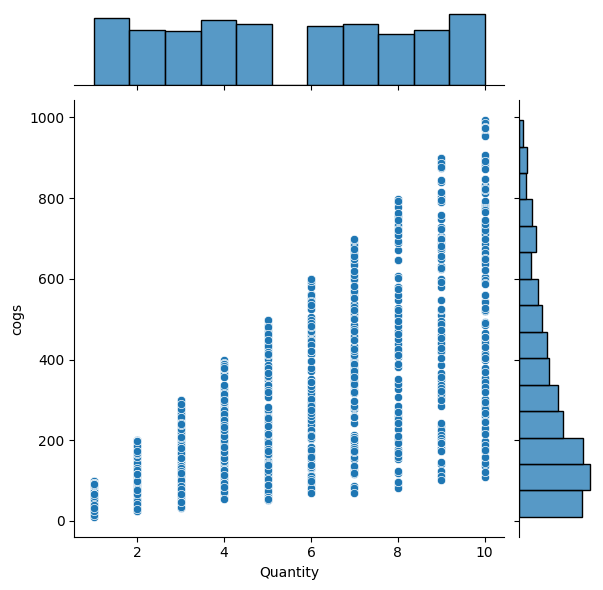

In [ ]:
sns.jointplot(y='cogs',x='Quantity',data=sales)

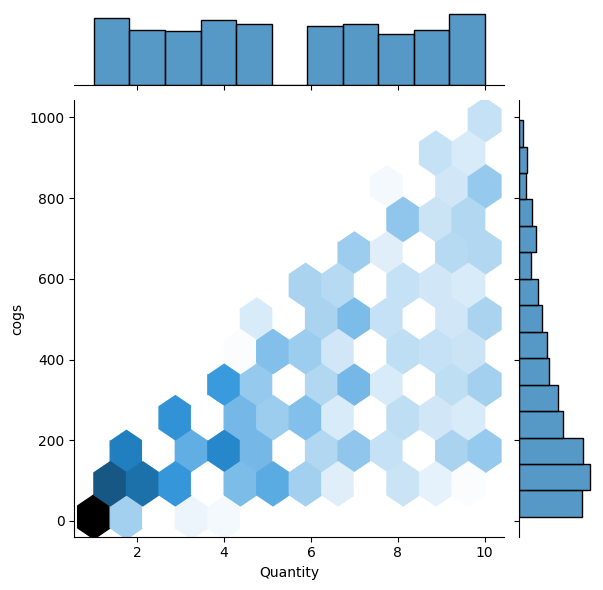

In [ ]:
sns.jointplot(y='cogs',x='Quantity',data=sales,kind='hex')

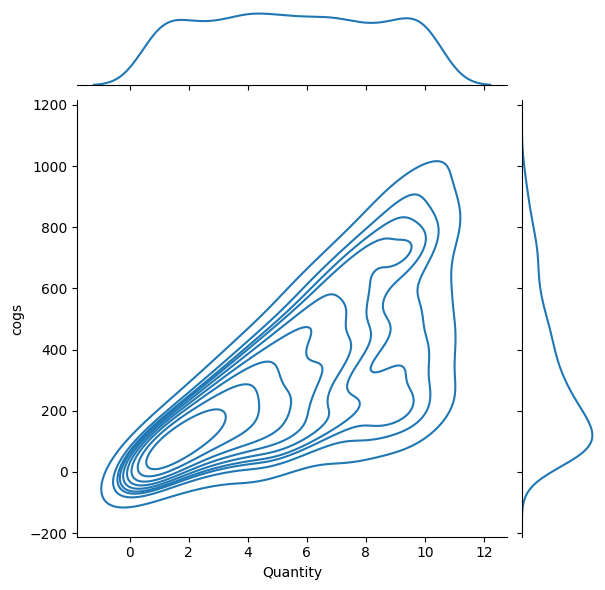

In [ ]:
sns.jointplot(y='cogs',x='Quantity',data=sales,kind='kde')

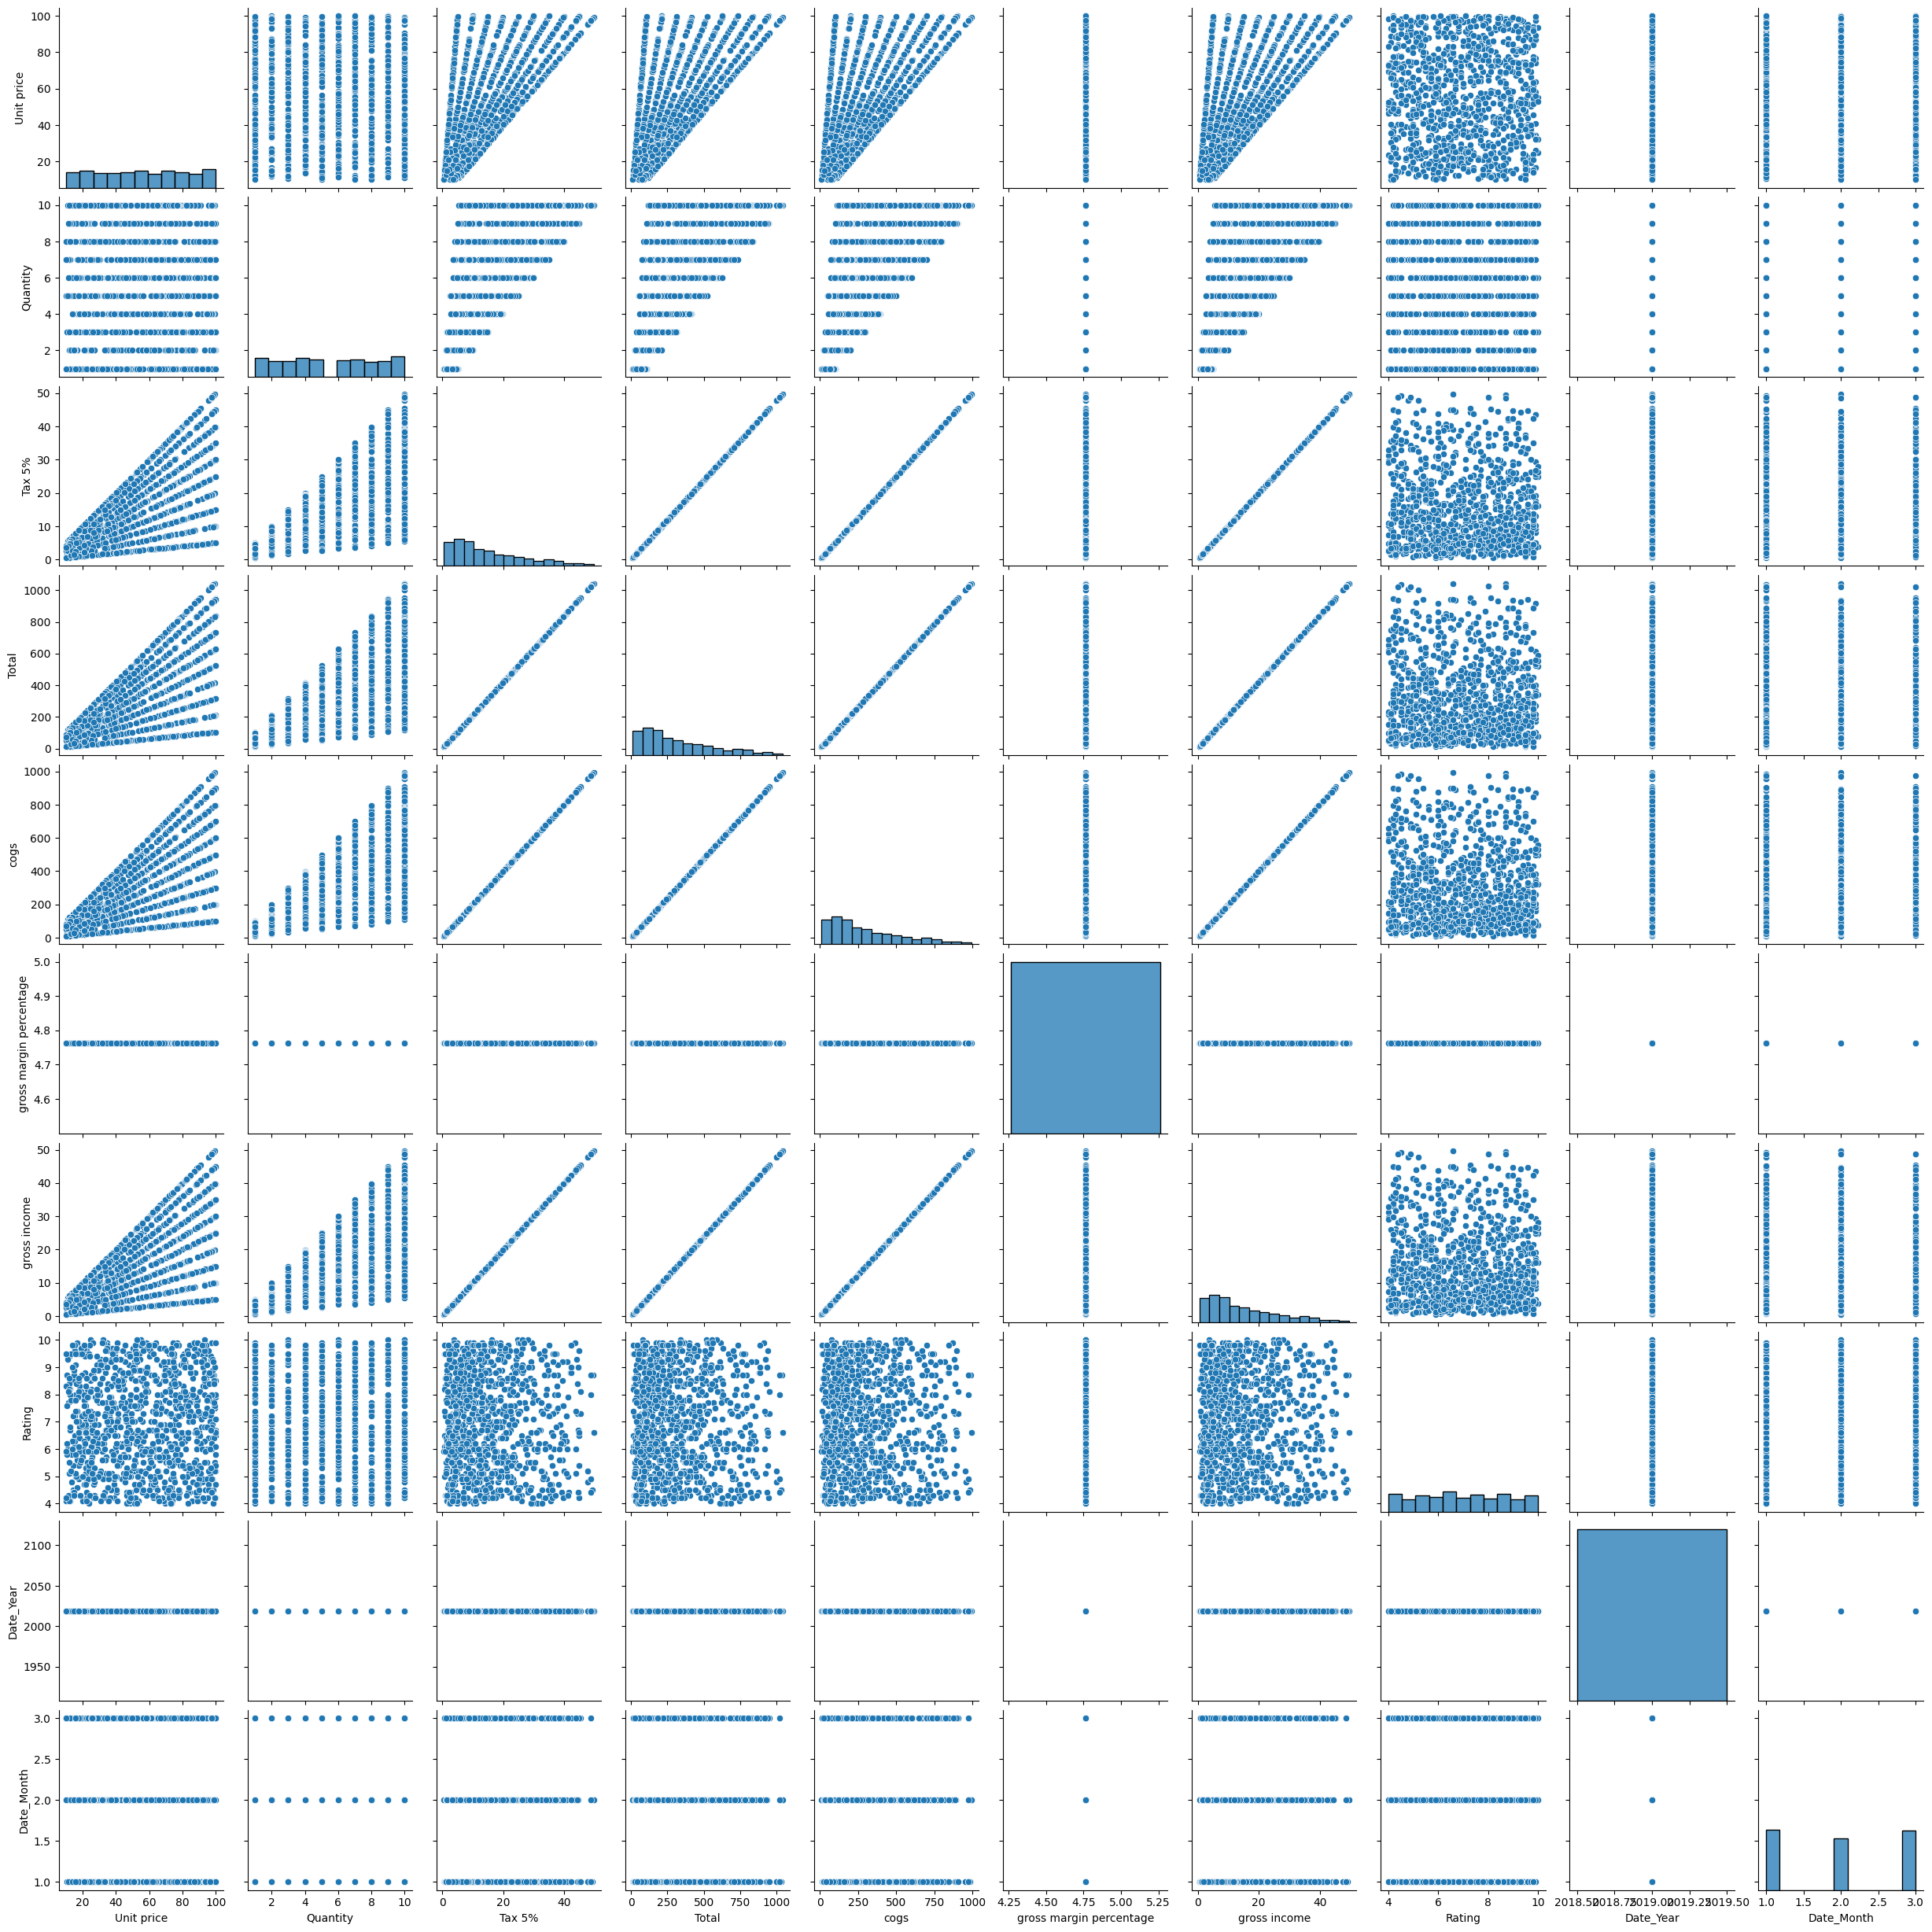

In [ ]:
sns.pairplot(sales)

In [ ]:
sns.pairplot(sales,hue='Product line')

Output hidden; open in https://colab.research.google.com to view.

In [1]:
# Some extra heatmaps trying

<ipython-input-5-e58dec5a2338>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")


<Axes: xlabel='Task', ylabel='Model'>

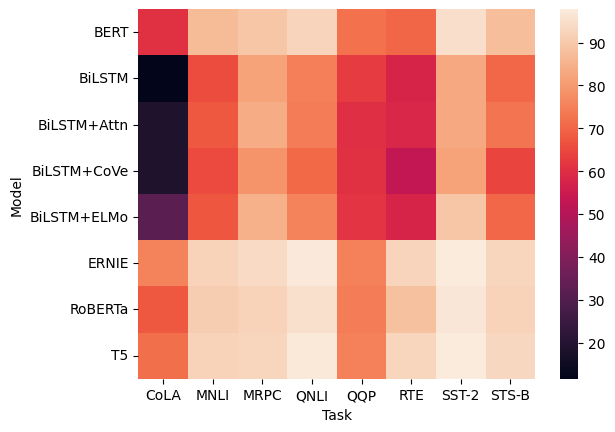

In [5]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
sns.heatmap(glue)

In [6]:
glue

Task         CoLA  MNLI  MRPC  QNLI   QQP   RTE  SST-2  STS-B
Model                                                        
BERT         60.5  86.7  89.3  92.7  72.1  70.1   94.9   87.6
BiLSTM       11.6  65.6  81.8  74.6  62.5  57.4   82.8   70.3
BiLSTM+Attn  18.6  67.6  83.9  74.3  60.1  58.4   83.0   72.8
BiLSTM+CoVe  18.5  65.4  78.7  70.8  60.6  52.7   81.9   64.4
BiLSTM+ELMo  32.1  67.2  84.7  75.5  61.1  57.4   89.3   70.3
ERNIE        75.5  92.3  93.9  97.3  75.2  92.6   97.8   93.0
RoBERTa      67.8  90.8  92.3  95.4  74.3  88.2   96.7   92.2
T5           71.6  92.2  92.8  96.9  75.1  92.8   97.5   93.1